In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv(r"C:\Users\ishit\Downloads\food_expiry_tracker.csv")

In [3]:
df.head()

,purchase_month,purchase_day_of_week,days_until_expiry,quantity,used_before_expiry,item_beverage,item_dairy,item_fruit,item_grain,item_meat,item_snack,item_vegetable,storage_freezer,storage_fridge,storage_pantry
0,0.000000,0.000000,0.041322,0.555556,1,False,False,False,False,False,False,True,False,True,False
1,0.636364,0.166667,0.209366,0.555556,1,False,False,False,True,False,False,False,True,False,False
2,0.181818,0.000000,0.595041,0.333333,1,True,False,False,False,False,False,False,False,True,False
3,0.181818,0.500000,0.022039,0.555556,1,False,True,False,False,False,False,False,False,True,False
4,0.818182,0.666667,0.526171,1.000000,1,False,False,False,False,False,True,False,True,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   purchase_month        500 non-null    float64
 1   purchase_day_of_week  500 non-null    float64
 2   days_until_expiry     500 non-null    float64
 3   quantity              500 non-null    float64
 4   used_before_expiry    500 non-null    int64  
 5   item_beverage         500 non-null    bool   
 6   item_dairy            500 non-null    bool   
 7   item_fruit            500 non-null    bool   
 8   item_grain            500 non-null    bool   
 9   item_meat             500 non-null    bool   
 10  item_snack            500 non-null    bool   
 11  item_vegetable        500 non-null    bool   
 12  storage_freezer       500 non-null    bool   
 13  storage_fridge        500 non-null    bool   
 14  storage_pantry        500 non-null    bool   
dtypes: bool(10), float64(4)

In [5]:
print(df.isnull().sum())

purchase_month          0
purchase_day_of_week    0
days_until_expiry       0
quantity                0
used_before_expiry      0
item_beverage           0
item_dairy              0
item_fruit              0
item_grain              0
item_meat               0
item_snack              0
item_vegetable          0
storage_freezer         0
storage_fridge          0
storage_pantry          0
dtype: int64


In [6]:
df.describe()

,purchase_month,purchase_day_of_week,days_until_expiry,quantity,used_before_expiry
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.481273,0.483000,0.203030,0.498889,0.786000
std,0.304593,0.328437,0.276491,0.322926,0.410538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.016529,0.222222,1.000000
50%,0.454545,0.500000,0.037190,0.555556,1.000000
75%,0.727273,0.833333,0.371901,0.777778,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


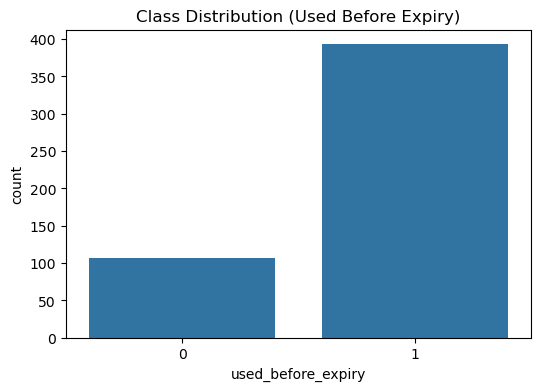

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='used_before_expiry')
plt.title("Class Distribution (Used Before Expiry)")
plt.show()

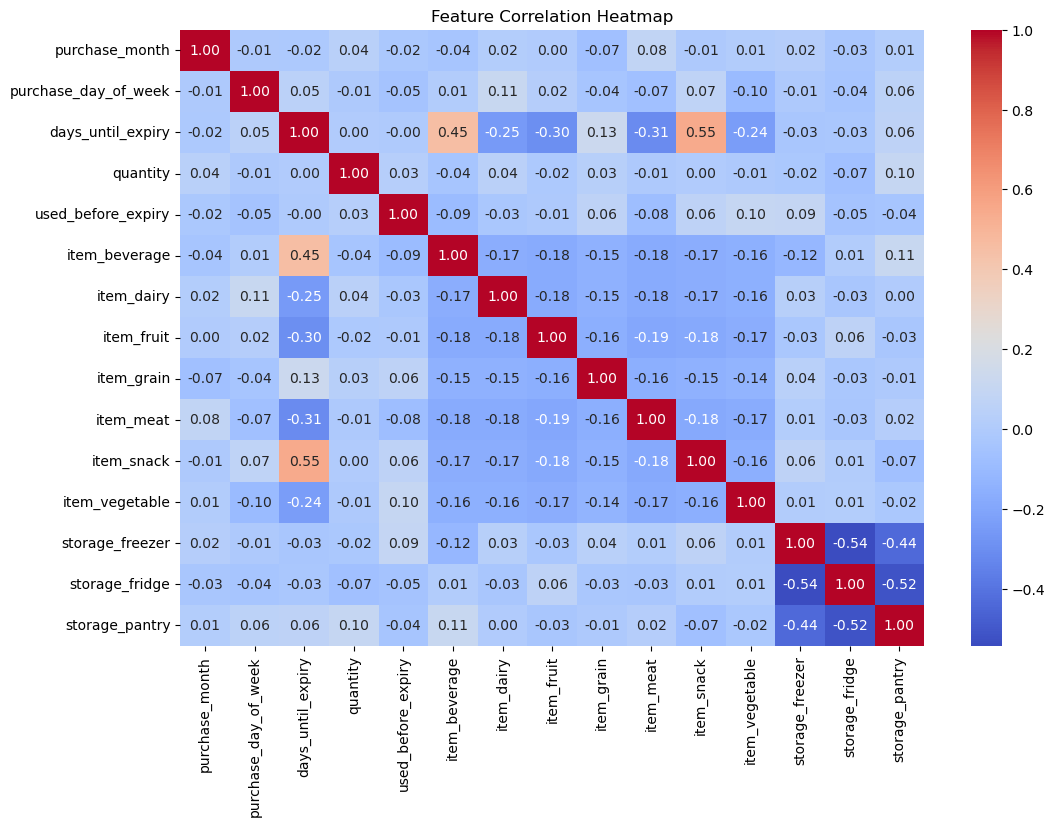

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df['used_before_expiry'].value_counts(normalize=True)

used_before_expiry
1    0.786
0    0.214
Name: proportion, dtype: float64

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

In [11]:
X = df.drop("used_before_expiry", axis=1)
y = df["used_before_expiry"]

In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [15]:
model = LogisticRegression(class_weight='balanced')

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39        21
           1       0.84      0.80      0.82        79

    accuracy                           0.72       100
   macro avg       0.60      0.61      0.60       100
weighted avg       0.74      0.72      0.73       100

[[ 9 12]
 [16 63]]


In [18]:
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl
